# Fed-Batch data generation

Within the simulator, one class is defined as the 'fedbatch' (relies on the 'batch' class) and it can be used to simulate fed-batch reactors with defined kinetics.

First, the package is loaded and available default examples are displayed using `show_implemented_examples` method.

In [2]:
from insidapy.simulate.ode import fedbatch
fedbatch().show_implemented_examples()

[+] The following examples are implemented in this FEDBATCH class:
+----------------------+----------------------------------------------------------------------------------+
|  Example ID string   | Description                                                                      |
+----------------------+----------------------------------------------------------------------------------+
|      fedbatch1       | Bioreaction in fedbatch operation mode. Constant input flow. 3 species and 1     |
|                      | volume. Bacteria growth, substrate consumption and product formation. Mimics the |
|                      | production of a target protein.                                                  |
+----------------------+----------------------------------------------------------------------------------+




Next, one can decide to use one of the implemented examples or define a new one. In this case, the example of a bioreaction in fedbatch operation mode with 3 species is used (`'fedbatch1'`). 
Each example would be fully defined with default values. However, we can overwrite these values by using the corresponding inputs. If we overwrite the default values, we are reminded to check that the given values are in correct order.

In [3]:
data = fedbatch(example='fedbatch1',                                            # Choose example. Defaults to "fedbatch1".
                nbatches=4,                                                     # Number of batches. Defaults to 3.
                npoints_per_batch=20,                                           # Number of points per batch and per species. Defaults to 20.
                noise_mode='percentage',                                        # Noise mode. Defaults to "percentage".
                noise_percentage=2.5,                                           # Noise percentage (in case mode is "percentage")      
                random_seed=10,                                                 # Random seed for reproducibility. Defaults to 0.
                bounds_initial_conditions=[[0.1, 50, 0.1, 0.1], [0.4, 90, 0.2, 10]],  # Bounds for initial conditions. Defaults to "None".
                time_span=[0, 80],                                              # Time span for integration. Defaults to "None". 
                initial_condition_generation_method='LHS',                      # Method for generating initial conditions. Defaults to "LHS".
                name_of_time_vector='time')                                     # Name of time vector. Defaults to "time".

[!] IMPORTANT: It seems that you changed the default bounds of the species. Make sure the order of the indicated bounds is the following: ['biomass', 'product', 'substrate', 'volume']


We can now print some information about the example.

In [4]:
data.print_info()

[+] Loaded the example FEDBATCH1 with the following properties:
+--------------------------------+------------------------------------------------------------------------+
| Property                       | Description                                                            |
+--------------------------------+------------------------------------------------------------------------+
| Example string                 | fedbatch1                                                              |
| Example description            | Bioreaction in fedbatch operation mode. Constant input flow. 3 species |
|                                | and 1 volume. Bacteria growth, substrate consumption and product       |
|                                | formation. Mimics the production of a target protein.                  |
| Short reference information    | ISBN 978-1-119-28591-5                                                 |
| Number of species              | 4                                    

This might be useful to use the example in a publication (use the short reference information given to reference where the example came from) or to check if the example is defined as intended.

After that, we can run the experiments to create some in-silico data using the `run_experiments` method. We can then for example check the data of the first experiment.

In [5]:
data.run_experiments()
print(data.y_noisy[0])

[+] Experiments done.
         time   biomass    product  substrate    volume
0    0.000000  0.170610  62.310537   0.195585  3.870119
1    4.210526  0.229802  59.563976   0.564204  4.196437
2    8.421053  0.273714  56.704083   0.799884  4.333703
3   12.631579  0.439917  55.419851   0.943265  4.607631
4   16.842105  0.648348  51.809027   0.885063  4.797903
5   21.052632  0.940617  50.583312   0.680357  5.102327
6   25.263158  1.193427  46.709251   0.446642  5.333964
7   29.473684  1.501493  46.311131   0.261561  5.281053
8   33.684211  1.545675  46.119174   0.183287  5.852505
9   37.894737  1.740762  41.893160   0.158977  5.713684
10  42.105263  1.869093  41.030178   0.134442  6.038717
11  46.315789  1.907932  38.812825   0.128943  6.506188
12  50.526316  1.990550  38.634757   0.102781  6.468446
13  54.736842  2.162627  36.016796   0.082139  6.957505
14  58.947368  2.271315  36.663173   0.059360  6.917161
15  63.157895  2.314698  36.818400   0.105836  7.327268
16  67.368421  2.406487  3

Most modeling approaches require a training dataset and a separate testing dataset. To generate separate datasets, the user can apply a splitting in an sklearn-manner. There is no default value set. In case the user calls the function, a `test_splitratio` in the range [0,1) needs to be chosen. The value represents the fraction of the total number of batches generated used for the test set. The data is then splitted and stored in the data object as `data.training` and `data.testing`. 

In [6]:
data.train_test_split(test_splitratio=0.2)

We can now plot the experiments. The fist way to do so is to plot all the runs using the `plot_experiments` method. The method lets us save the figure using a path (`save_figure_directory`), a name (`figname`) and an some extensions (`save_figure_exensions`) as a list. By using `show=False`, the plot will not be displayed in a running code.

[+] Saving figure:
	->png: .\figures\fedbatch1_simulated_batches.png


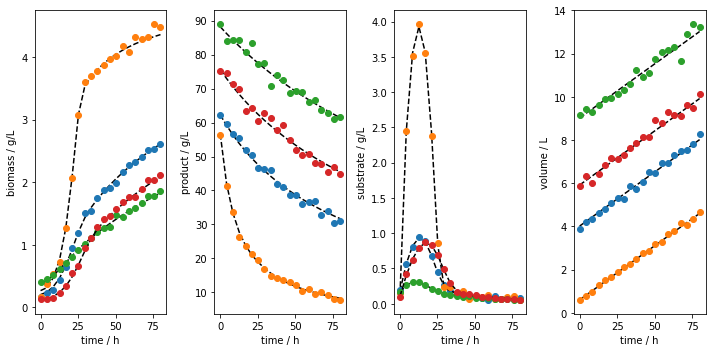

In [7]:
data.plot_experiments(  save=True, 
                        show= False, 
                        figname=f'{data.example}_simulated_batches',
                        save_figure_directory=r'.\figures', 
                        save_figure_exensions=['png'])

We can also visualize the training and testing runs individually using the `plot_train_test_experiments` method.

[+] Saving figure:
	->png: .\figures\fedbatch1_simulated_batches_train_test.png


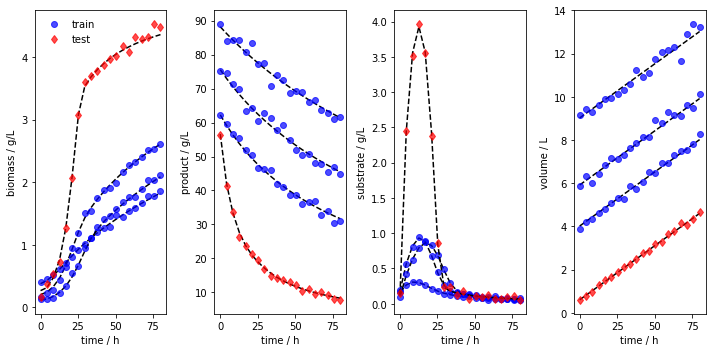

In [8]:
data.plot_train_test_experiments(   save=True, 
                                    show=False,
                                    figname=f'{data.example}_simulated_batches_train_test',
                                    save_figure_directory=r'.\figures', 
                                    save_figure_exensions=['png'])

After the simulation, one can export the data as XLSX files. By choosing `which_dataset` to be `training` (only executable if `train_test_split` was applied), `testing` (only executable if `train_test_split` was applied), or `all` (always executable), the corresponding data is exported to the indicated location:

In [9]:
data.export_dict_data_to_excel(destination=r'.\data', which_dataset='all')      # Exports all the data
data.export_dict_data_to_excel(destination=r'.\data', which_dataset='training') # Exports the training data (blue circles in Fig 2)
data.export_dict_data_to_excel(destination=r'.\data', which_dataset='testing')  # Exports the training data (red diamonds in Fig 2)

[+] Exported batch data to excel.
	-> Dataset: ALL (options: training, testing, all)
	-> Noise free data to: .\data\fedbatch_fedbatch1_all_batchdata.xlsx
	-> Noisy data to: .\data\fedbatch_fedbatch1_all_batchdata_noisy.xlsx
[+] Exported batch data to excel.
	-> Dataset: TRAINING (options: training, testing, all)
	-> Noise free data to: .\data\fedbatch_fedbatch1_training_batchdata.xlsx
	-> Noisy data to: .\data\fedbatch_fedbatch1_training_batchdata_noisy.xlsx
[+] Exported batch data to excel.
	-> Dataset: TESTING (options: training, testing, all)
	-> Noise free data to: .\data\fedbatch_fedbatch1_testing_batchdata.xlsx
	-> Noisy data to: .\data\fedbatch_fedbatch1_testing_batchdata_noisy.xlsx
